# Import required dependencies


In [1]:
import nltk
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Load data and perform EDA

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
df.nunique()

id        20800
title     19803
author     4201
text      20386
label         2
dtype: int64

In [7]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
df.dropna(subset=['text'], inplace=True)

In [9]:
df.fillna(' ', inplace=True)

In [10]:
df['content'] = df['title'] + ' ' + df['author'] + ' ' + df['text']

In [11]:
df.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [15]:
from sklearn.base import BaseEstimator, TransformerMixin
sett = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
port_stem = nltk.PorterStemmer()

class Preprocessing(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self
    
    def clean_text(sekf, text):
        text = text.lower()
        text = re.sub(r'\d+', '', text)
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = text.strip()
        text = word_tokenize(text)
        text = [word for word in text if word not in sett]
        text = [lemmatizer.lemmatize(word) for word in text]
        text = ' '.join(text)
    
        return text
    
    
    def stemming(self, content):
        text = re.sub('[^a-zA-Z]',' ',content)
        text = text.lower()
        text = text.split()
        text = [port_stem.stem(word) for word in text if not word in sett]
        text = ' '.join(text)
        return text

    def transform(self, X, y=None):
        return X.apply(lambda text: self.stemming(self.clean_text(text)))

In [ ]:
preprocessor = Preprocessing()
df['processed_content'] = preprocessor.transform(df['content'])


In [ ]:
df['processed_content'].head()

0    hous dem aid didnt even see comey letter jason...
1    flynn hillari clinton big woman campu breitbar...
2    truth might get fire consortiumnewscom truth m...
3    civilian kill singl u airstrik identifi jessic...
4    iranian woman jail fiction unpublish stori wom...
Name: processed_content, dtype: object

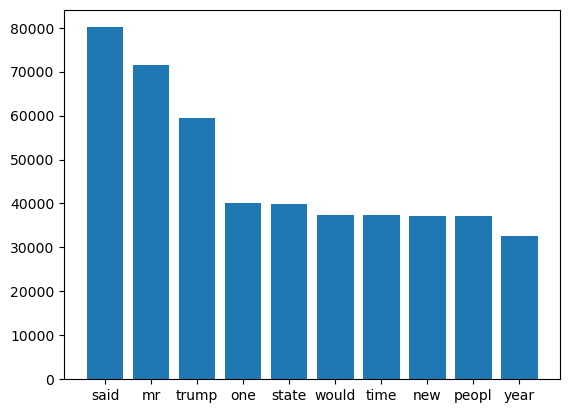

In [ ]:
# word frequency

from collections import Counter
import matplotlib.pyplot as plt

def plot_word_frequency(text):
    words = text.split()
    counter = Counter(words)
    most_common = counter.most_common(10)
    x, y = zip(*most_common)
    plt.bar(x, y)
    plt.show()

plot_word_frequency(df['processed_content'].str.cat(sep=' '))

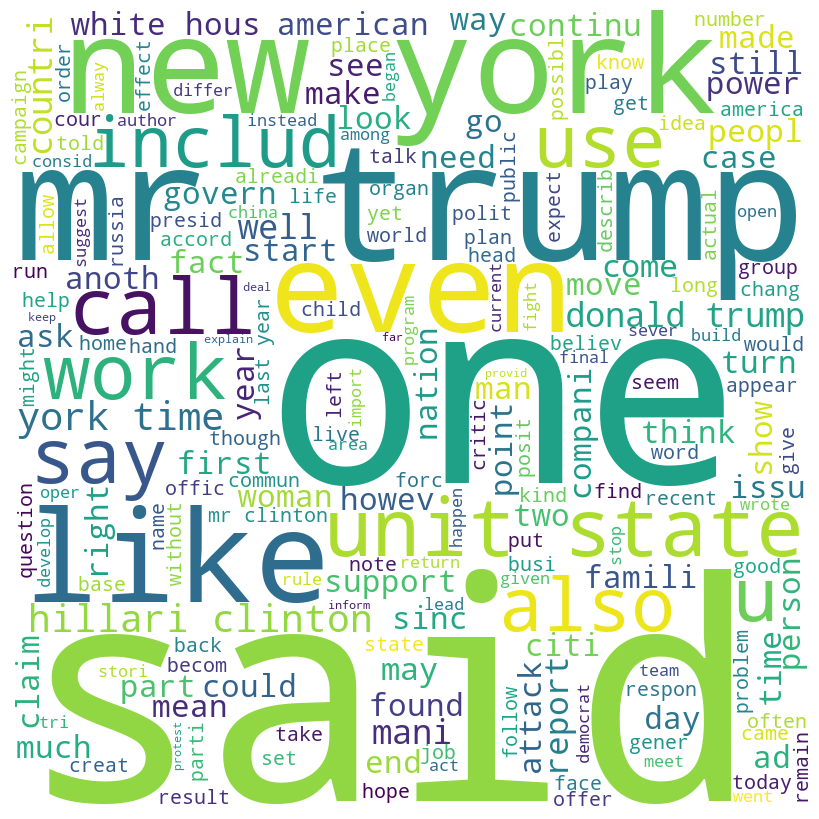

In [ ]:
# word cloud

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(df['processed_content'].str.cat(sep=' '))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

<Axes: >

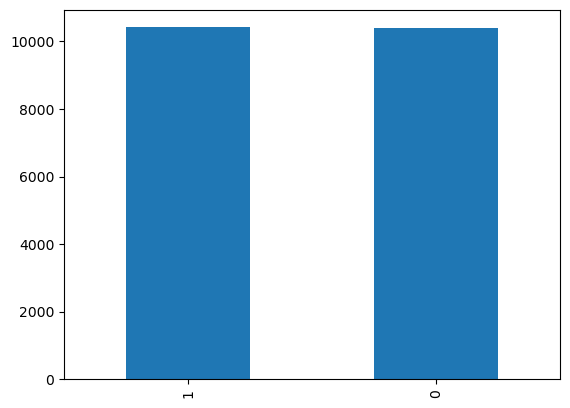

In [ ]:
df['label'].value_counts().plot(kind='bar')

In [ ]:
df.head()

,id,title,author,label,processed_content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,1,hous dem aid didnt even see comey letter jason...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,0,flynn hillari clinton big woman campu breitbar...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,1,truth might get fire consortiumnewscom truth m...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,1,civilian kill singl u airstrik identifi jessic...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,1,iranian woman jail fiction unpublish stori wom...


In [ ]:
# save preprocessed data only the drop text and content columns
df.to_csv('prepared_data.csv', index=False)


In [ ]:
# split the data
X = df['processed_content']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# tfidf vectorizer 
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# logistic regression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

y_pred = lr.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2132
           1       0.95      0.95      0.95      2028

    accuracy                           0.95      4160
   macro avg       0.95      0.95      0.95      4160
weighted avg       0.95      0.95      0.95      4160



In [ ]:
# NB classifier
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

y_pred = nb.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      2132
           1       0.99      0.71      0.83      2028

    accuracy                           0.85      4160
   macro avg       0.88      0.85      0.85      4160
weighted avg       0.88      0.85      0.85      4160



In [ ]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_tfidf, y_train)

y_pred = dt.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2132
           1       0.96      0.95      0.96      2028

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160



In [ ]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)

y_pred = rf.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2132
           1       0.95      0.89      0.92      2028

    accuracy                           0.93      4160
   macro avg       0.93      0.93      0.93      4160
weighted avg       0.93      0.93      0.93      4160



In [ ]:
# voting classifier
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('lr', lr), ('dt', dt), ('rf', rf)], voting='hard')

vc.fit(X_train_tfidf, y_train)

y_pred = vc.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2132
           1       0.98      0.95      0.97      2028

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



In [ ]:
# test the model

text = 'israel invaded rafa and killed 10 people'

text = preprocessor.transform(pd.Series(text))

text_tfidf = tfidf.transform(text)


print(vc.predict(text_tfidf))


[1]


In [ ]:
# save models
import pickle

pickle.dump(vc, open('model.pkl', 'wb'))
pickle.dump(preprocessor, open('preprocessor.pkl', 'wb'))
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))